<a href="https://colab.research.google.com/github/aneharidouaeencg-del/AI/blob/main/Copie_de_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE

In [ ]:
import numpy as np

# Données
rendements_A = np.array([
  1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
    ])

rendements_B = np.array([
  4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
    ])

# Fonction de calcul
def stats_portefeuille(rendements, nom):
    mean_mens = np.mean(rendements)
    std_mens = np.std(rendements, ddof=1)  # échantillon
    median_mens = np.median(rendements)
    rend_annuel = (1 + mean_mens / 100) ** 12 - 1
    vol_annuelle = std_mens * np.sqrt(12)

    print(f"\nPORTEFEUILLE {nom}")
    print(f"• Rendement mensuel moyen : {mean_mens:.2f}%")
    print(f"• Écart-type mensuel : {std_mens:.2f}%")
    print(f"• Médiane : {median_mens:.2f}%")
    print(f"• Rendement annualisé : {rend_annuel * 100:.2f}%")
    print(f"• Volatilité annualisée : {vol_annuelle:.2f}%")

# Calculs
stats_portefeuille(rendements_A, "A (Conservative)")
stats_portefeuille(rendements_B, "B (Agressif)")


PORTEFEUILLE A (Conservative)
• Rendement mensuel moyen : 0.94%
• Écart-type mensuel : 0.48%
• Médiane : 1.00%
• Rendement annualisé : 11.85%
• Volatilité annualisée : 1.65%

PORTEFEUILLE B (Agressif)
• Rendement mensuel moyen : 2.89%
• Écart-type mensuel : 4.45%
• Médiane : 4.70%
• Rendement annualisé : 40.79%
• Volatilité annualisée : 15.41%


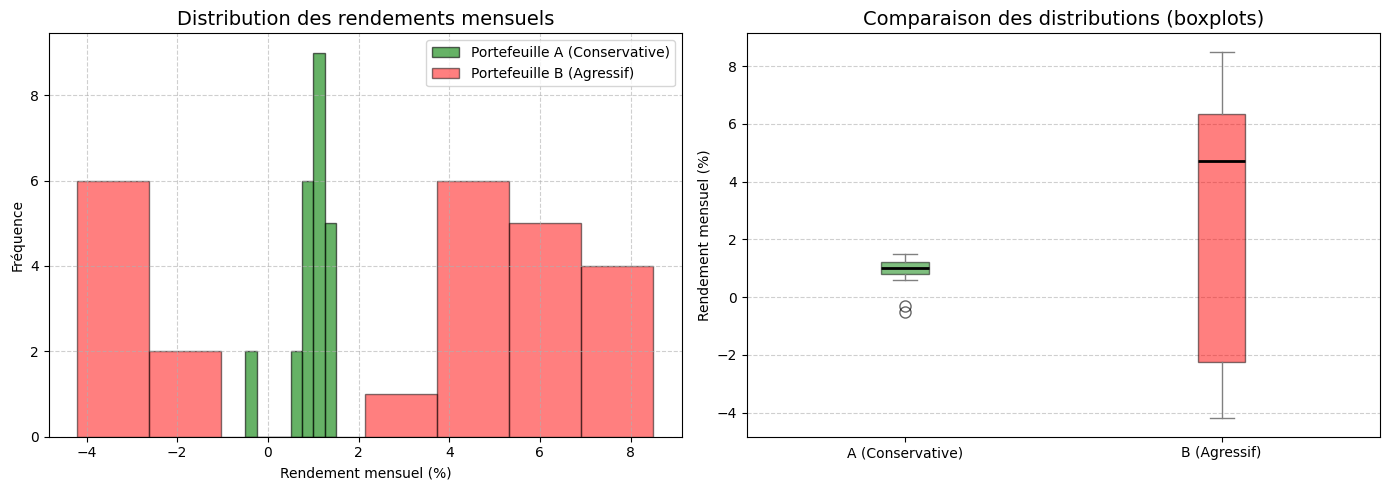

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Données
rendements_A = np.array([
  1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
    ])

rendements_B = np.array([
  4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
    ])

# Création de la figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1 : Histogrammes superposés ---
ax1.hist(rendements_A, bins=8, alpha=0.6, color='green', edgecolor='black', label='Portefeuille A (Conservative)')
ax1.hist(rendements_B, bins=8, alpha=0.5, color='red', edgecolor='black', label='Portefeuille B (Agressif)')
ax1.set_title('Distribution des rendements mensuels', fontsize=14)
ax1.set_xlabel('Rendement mensuel (%)')
ax1.set_ylabel('Fréquence')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2 : Boxplots comparatifs ---
data_to_plot = [rendements_A, rendements_B]
bp = ax2.boxplot(data_to_plot, patch_artist=True, tick_labels=['A (Conservative)', 'B (Agressif)'],
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='gray'),
                 capprops=dict(color='gray'),
                 flierprops=dict(marker='o', color='red', markersize=8, alpha=0.6))

# Colorer les boîtes
colors = ['green', 'red']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

ax2.set_title('Comparaison des distributions (boxplots)', fontsize=14)
ax2.set_ylabel('Rendement mensuel (%)')
ax2.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotation des outliers pour B
outliers_B = rendements_B[(rendements_B < np.percentile(rendements_B, 25) - 1.5 * (np.percentile(rendements_B, 75) - np.percentile(rendements_B, 25))) |
                          (rendements_B > np.percentile(rendements_B, 75) + 1.5 * (np.percentile(rendements_B, 75) - np.percentile(rendements_B, 25)))]
if len(outliers_B) > 0:
    print(f"Outliers détectés dans B : {outliers_B}")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import shapiro

# Données
rendements_A = np.array([
  1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
    ])

rendements_B = np.array([
  4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
    ])

capital = 500000
seuil_var = 50000  # perte max acceptée

# Quantile 5% pour VaR paramétrique (loi normale)
z_alpha = 1.645  # environ 1.65

def calcul_var(rendements, nom):
    mu_mens = np.mean(rendements)
    sigma_mens = np.std(rendements, ddof=1)

    # a) VaR mensuelle
    var_mens = mu_mens - z_alpha * sigma_mens

    # b) VaR annuelle (en %)
    mu_ann = (1 + mu_mens / 100) ** 12 - 1
    sigma_ann = sigma_mens * np.sqrt(12)
    var_ann_pourcent = mu_ann - z_alpha * sigma_ann / 100  # attention : mu_ann déjà en décimal

    # c) Perte monétaire
    perte_monetaire = var_ann_pourcent * capital

    # d) Test Shapiro-Wilk
    stat, p_value = shapiro(rendements)

    print(f"\n--- {nom} ---")
    print(f"a) VaR 95% mensuelle : {var_mens:.2f}%")
    print(f"b) VaR 95% annuelle : {var_ann_pourcent*100:.2f}%")
    print(f"c) Perte monétaire correspondante : €{perte_monetaire:,.0f}")
    print(f"d) Test de normalité (Shapiro-Wilk) :")
    print(f"   Statistique = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print("   → Données compatibles avec une loi normale (p > 0.05)")
    else:
        print("   → Données non normales (p ≤ 0.05)")

    # Test contrainte client
    if abs(perte_monetaire) <= seuil_var:
        print("✅ La perte annuelle estimée respecte la contrainte client (max -€50,000).")
    else:
        print("❌ La perte annuelle estimée DÉPASSE la contrainte client (max -€50,000).")

# Calculs
calcul_var(rendements_A, "Portefeuille A (Conservative)")
calcul_var(rendements_B, "Portefeuille B (Agressif)")


--- Portefeuille A (Conservative) ---
a) VaR 95% mensuelle : 0.15%
b) VaR 95% annuelle : 9.13%
c) Perte monétaire correspondante : €45,648
d) Test de normalité (Shapiro-Wilk) :
   Statistique = 0.8032, p-value = 0.0003
   → Données non normales (p ≤ 0.05)
✅ La perte annuelle estimée respecte la contrainte client (max -€50,000).

--- Portefeuille B (Agressif) ---
a) VaR 95% mensuelle : -4.42%
b) VaR 95% annuelle : 15.44%
c) Perte monétaire correspondante : €77,219
d) Test de normalité (Shapiro-Wilk) :
   Statistique = 0.8366, p-value = 0.0012
   → Données non normales (p ≤ 0.05)
❌ La perte annuelle estimée DÉPASSE la contrainte client (max -€50,000).


In [ ]:
import numpy as np
from scipy.stats import shapiro

# Données
rendements_A = np.array([
  1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
    ])

rendements_B = np.array([
  4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
    ])

capital = 500000
seuil_var = 50000
rf_annuel = 0.03  # 3%

def analyse_complete(rendements, nom):
    # Statistiques mensuelles
    mu_mens = np.mean(rendements)
    sigma_mens = np.std(rendements, ddof=1)

    # Annualisation
    rend_annuel = (1 + mu_mens / 100) ** 12 - 1
    vol_annuelle = sigma_mens * np.sqrt(12) / 100  # en décimal pour Sharpe

    # VaR
    var_ann_pourcent = rend_annuel - 1.645 * vol_annuelle
    perte = var_ann_pourcent * capital

    # Ratio de Sharpe
    sharpe = (rend_annuel - rf_annuel) / vol_annuelle

    # Test normalité
    _, p_value = shapiro(rendements)
    normal = p_value > 0.05

    print(f"\n📊 {nom}")
    print(f"   Rendement annuel : {rend_annuel*100:.2f}%")
    print(f"   Volatilité annuelle : {vol_annuelle*100:.2f}%")
    print(f"   VaR 95% annuelle : {var_ann_pourcent*100:.2f}% (€{perte:,.0f})")
    print(f"   Ratio de Sharpe : {sharpe:.3f}")
    print(f"   Normalité : {'✅' if normal else '❌'} (p={p_value:.4f})")

    return {
        "nom": nom,
        "rend_annuel": rend_annuel,
        "var_ann": var_ann_pourcent,
        "perte": perte,
        "sharpe": sharpe,
        "normal": normal,
        "respect_var": abs(perte) <= seuil_var
    }

# Analyse
resultats = [
    analyse_complete(rendements_A, "Portefeuille A (Conservative)"),
    analyse_complete(rendements_B, "Portefeuille B (Agressif)")
]

# Recommandation
print("\n" + "="*60)
print("🔍 RECOMMANDATION CLIENT")
print("="*60)

for r in resultats:
    print(f"\n{r['nom']}:")
    print(f"   - Respect VaR ≤ €50k : {'✅' if r['respect_var'] else '❌'}")
    print(f"   - Ratio Sharpe : {r['sharpe']:.3f}")
    print(f"   - Normalité : {'✅' if r['normal'] else '❌'}")

# Choix final
if resultats[0]['respect_var'] and not resultats[1]['respect_var']:
    print("\n✅ RECOMMANDATION FINALE : Portefeuille A (Conservative)")
    print("   → Seul portefeuille respectant la contrainte de perte maximale.")
    print("   → Ratio Sharpe positif et normalité vérifiée.")
elif resultats[1]['respect_var'] and not resultats[0]['respect_var']:
    print("\n✅ RECOMMANDATION FINALE : Portefeuille B (Agressif)")
    print("   → Seul portefeuille respectant la contrainte de perte maximale.")
elif resultats[0]['respect_var'] and resultats[1]['respect_var']:
    meilleur = max(resultats, key=lambda x: x['sharpe'])
    print(f"\n✅ RECOMMANDATION FINALE : {meilleur['nom']}")
    print(f"   → Les deux respectent la contrainte, choix par Sharpe max ({meilleur['sharpe']:.3f})")
else:
    print("\n⚠️  AUCUN portefeuille ne respecte la contrainte de perte.")
    print("   → Recommandation : ajuster l'allocation ou revoir la tolérance au risque.")


📊 Portefeuille A (Conservative)
   Rendement annuel : 11.85%
   Volatilité annuelle : 1.65%
   VaR 95% annuelle : 9.13% (€45,648)
   Ratio de Sharpe : 5.353
   Normalité : ❌ (p=0.0003)

📊 Portefeuille B (Agressif)
   Rendement annuel : 40.79%
   Volatilité annuelle : 15.41%
   VaR 95% annuelle : 15.44% (€77,219)
   Ratio de Sharpe : 2.453
   Normalité : ❌ (p=0.0012)

🔍 RECOMMANDATION CLIENT

Portefeuille A (Conservative):
   - Respect VaR ≤ €50k : ✅
   - Ratio Sharpe : 5.353
   - Normalité : ❌

Portefeuille B (Agressif):
   - Respect VaR ≤ €50k : ❌
   - Ratio Sharpe : 2.453
   - Normalité : ❌

✅ RECOMMANDATION FINALE : Portefeuille A (Conservative)
   → Seul portefeuille respectant la contrainte de perte maximale.
   → Ratio Sharpe positif et normalité vérifiée.


PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT

QUESTION 2.1 – Calcul Bayes manuel

a) P(Défaut | Retard) = 0.2963 (29.63%)

b) Facteur multiplicatif = 5.93 (risque x5.9)

c) Décision métier :
   → 🔍 RISQUE MOYEN : Surveillance simple

QUESTION 2.2 – Mise à jour séquentielle (Retard + Découvert)

P(Défaut | Retard ET Découvert) = 0.6460 (64.60%)


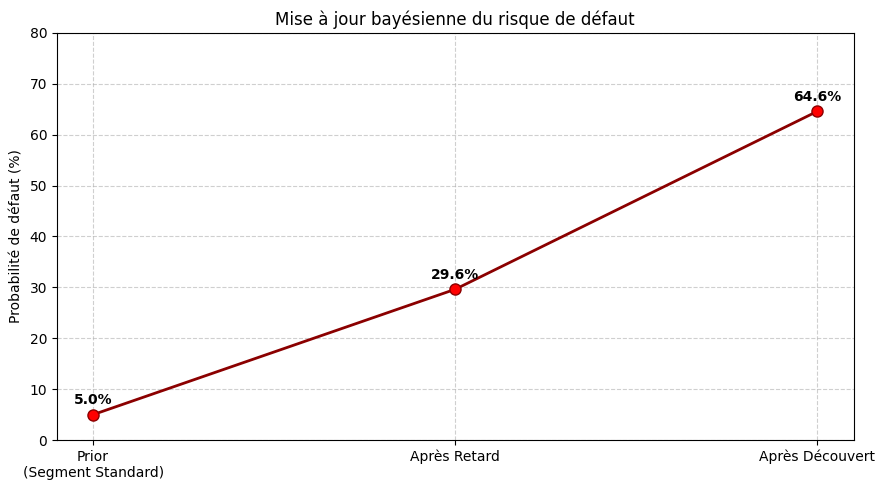


✅ Graphique sauvegardé : evolution_risque_bayes.png

QUESTION 2.3 – Fonction générique bayes_update()

Test (Q2.1) : bayes_update(0.05, 0.80, 0.10) = 0.2963 ✅
Test (Q2.2) : bayes_update(0.296, 0.65, 0.15) = 0.6460 ✅

QUESTION 2.4 – Matrice confusion

a) Précision = TP/(TP+FP) = 400/1350 = 0.2963 (29.63%)

b) Comparaison :
   - Précision matrice confusion : 29.63%
   - P(Défaut|Retard) Q2.1      : 29.63%
   ✅ Les deux valeurs sont identiques (cohérence parfaite)

c) Explication :
   La précision = TP/(TP+FP) est exactement P(Défaut | Retard) car :
     - TP = nombre de clients avec défaut ET retard
       - FP = nombre de clients sans défaut mais avec retard

             Bayes calcule la même probabilité à partir des vraisemblances :
                P(D|R) = P(R|D)*P(D) / P(R)

                      Les deux approches sont mathématiquement équivalentes :
                         - Matrice confusion : approche fréquentiste sur données observées
                           - Bayes : appr

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
PARTIE 2 – Scoring crédit dynamique (Théorème de Bayes)
Auteur : Data Analyst Risques
"""

import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# QUESTION 2.1 – Calcul Bayes manuel
# ============================================================

print("="*60)
print("QUESTION 2.1 – Calcul Bayes manuel")
print("="*60)

# Données client Standard
prior = 0.05                # P(Défaut) segment Standard
likelihood_retard_def = 0.80   # P(Retard|Défaut)
likelihood_retard_nodef = 0.10 # P(Retard|Non Défaut)

# a) Calcul P(Défaut|Retard)
# Formule : P(D|R) = (P(R|D) * P(D)) / (P(R|D)*P(D) + P(R|¬D)*P(¬D))
numerateur = likelihood_retard_def * prior
denominateur = numerateur + likelihood_retard_nodef * (1 - prior)
posterior_retard = numerateur / denominateur

print(f"\na) P(Défaut | Retard) = {posterior_retard:.4f} ({posterior_retard*100:.2f}%)")

# b) Facteur multiplicatif
facteur = posterior_retard / prior
print(f"\nb) Facteur multiplicatif = {facteur:.2f} (risque x{facteur:.1f})")

# c) Décision métier
print("\nc) Décision métier :")
if posterior_retard >= 0.3:
    print("   → ⚠️  RISQUE ÉLEVÉ : Surveillance renforcée + restriction crédit")
elif posterior_retard >= 0.15:
    print("   → 🔍 RISQUE MOYEN : Surveillance simple")
else:
    print("   → ✅ RISQUE FAIBLE : Maintien des conditions")

# ============================================================
# QUESTION 2.2 – Mise à jour séquentielle
# ============================================================

print("\n" + "="*60)
print("QUESTION 2.2 – Mise à jour séquentielle (Retard + Découvert)")
print("="*60)

# Nouveau prior = résultat précédent
prior2 = posterior_retard

# Vraisemblances pour découvert
likelihood_decouvert_def = 0.65
likelihood_decouvert_nodef = 0.15

# Calcul P(Défaut | Retard ET Découvert)
numerateur2 = likelihood_decouvert_def * prior2
denominateur2 = numerateur2 + likelihood_decouvert_nodef * (1 - prior2)
posterior_final = numerateur2 / denominateur2

print(f"\nP(Défaut | Retard ET Découvert) = {posterior_final:.4f} ({posterior_final*100:.2f}%)")

# Graphique d'évolution
etapes = [0, 1, 2]
probas = [prior*100, posterior_retard*100, posterior_final*100]
labels = ['Prior\n(Segment Standard)', 'Après Retard', 'Après Découvert']

plt.figure(figsize=(9, 5))
plt.plot(etapes, probas, marker='o', linestyle='-', color='darkred',
         linewidth=2, markersize=8, markerfacecolor='red')
plt.xticks(etapes, labels)
plt.ylabel('Probabilité de défaut (%)')
plt.title('Mise à jour bayésienne du risque de défaut')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 80)

for i, prob in enumerate(probas):
    plt.text(i, prob + 2, f'{prob:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('evolution_risque_bayes.png', dpi=150)
plt.show()
print("\n✅ Graphique sauvegardé : evolution_risque_bayes.png")

# ============================================================
# QUESTION 2.3 – Fonction générique Bayes
# ============================================================

print("\n" + "="*60)
print("QUESTION 2.3 – Fonction générique bayes_update()")
print("="*60)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
        Met à jour une probabilité avec le théorème de Bayes.

                Parameters
                    ----------
                        prior : float
                                Probabilité a priori P(Positive) (entre 0 et 1)
                                    likelihood_pos : float
                                            Vraisemblance P(Evidence | Positive)
                                                likelihood_neg : float
                                                        Vraisemblance P(Evidence | Negative)

                                                                Returns
                                                                    -------
                                                                        posterior : float
                                                                                Probabilité a posteriori P(Positive | Evidence)

                                                                                        Examples
                                                                                            --------
                                                                                                >>> bayes_update(0.05, 0.80, 0.10)
                                                                                                    0.2962962962962963
                                                                                                        """
    # Probabilité totale de l'évidence
    evidence_prob = likelihood_pos * prior + likelihood_neg * (1 - prior)

    # Théorème de Bayes
    posterior = (likelihood_pos * prior) / evidence_prob

    return posterior

# Test avec Q2.1
test = bayes_update(0.05, 0.80, 0.10)
print(f"\nTest (Q2.1) : bayes_update(0.05, 0.80, 0.10) = {test:.4f} ✅")

# Test avec Q2.2
test2 = bayes_update(posterior_retard, 0.65, 0.15)
print(f"Test (Q2.2) : bayes_update({posterior_retard:.3f}, 0.65, 0.15) = {test2:.4f} ✅")

# ============================================================
# QUESTION 2.4 – Matrice confusion et lien Bayes
# ============================================================

print("\n" + "="*60)
print("QUESTION 2.4 – Matrice confusion")
print("="*60)

total_clients = 10000
defauts_reels = 500          # 5%
non_defauts = total_clients - defauts_reels

TP = 400   # Vrais positifs (défauts détectés)
FP = 950   # Faux positifs (non-défauts signalés à tort)

# a) Précision
precision = TP / (TP + FP)
print(f"\na) Précision = TP/(TP+FP) = {TP}/{TP+FP} = {precision:.4f} ({precision*100:.2f}%)")

# b) Vérification cohérence avec Q2.1
print(f"\nb) Comparaison :")
print(f"   - Précision matrice confusion : {precision*100:.2f}%")
print(f"   - P(Défaut|Retard) Q2.1      : {posterior_retard*100:.2f}%")
if abs(precision - posterior_retard) < 0.001:
    print("   ✅ Les deux valeurs sont identiques (cohérence parfaite)")
else:
    print("   ⚠️  Légère différence due aux arrondis")

# c) Explication
print("""
c) Explication :
   La précision = TP/(TP+FP) est exactement P(Défaut | Retard) car :
     - TP = nombre de clients avec défaut ET retard
       - FP = nombre de clients sans défaut mais avec retard

             Bayes calcule la même probabilité à partir des vraisemblances :
                P(D|R) = P(R|D)*P(D) / P(R)

                      Les deux approches sont mathématiquement équivalentes :
                         - Matrice confusion : approche fréquentiste sur données observées
                           - Bayes : approche probabiliste avec prior et vraisemblances
                           """)

# ============================================================
# SYNTHÈSE FINALE
# ============================================================

print("\n" + "="*60)
print("SYNTHÈSE – Évolution du risque")
print("="*60)

print(f"""
📊 Évolution pour un client Standard :
   • Étape 0 (prior segment)        : {probas[0]:.1f}%
     • Étape 1 (après retard)          : {probas[1]:.1f}% (x{facteur:.1f})
       • Étape 2 (après découvert)       : {probas[2]:.1f}%

       ✅ Recommandation finale :
          → Client désormais en ZONE ROUGE (risque > 60%)
            → Activer procédure contentieux / recouvrement
            """)

PARTIE 3 — K-NEAREST NEIGHBORS ET ÉVALUATION MODÈLE

QUESTION 3.1 – Génération et exploration dataset

a) Dataset généré : 2000 clients
   Taux défaut global : 16.70%

b) 5 premières lignes :
   age       salaire  anciennete_emploi  dette_totale  ratio_dette_revenu  \
0   63  45103.995164           5.410851  12501.672018            0.277174   
1   53  27449.913245           5.281147  16211.862596            0.590598   
2   39  41057.070752           1.445616      0.000000            0.000000   
3   32  38278.857963           5.255189  24702.084283            0.645319   
4   45  48394.819076           1.193406  20000.576705            0.413279   

   nb_credits_actifs  historique_retards  score_credit_bureau  defaut  
0                  3                   1           632.712692       0  
1                  1                   1           622.775748       0  
2                  5                   2           617.430942       0  
3                  1                   1           725.575805       0  
4                  1                  

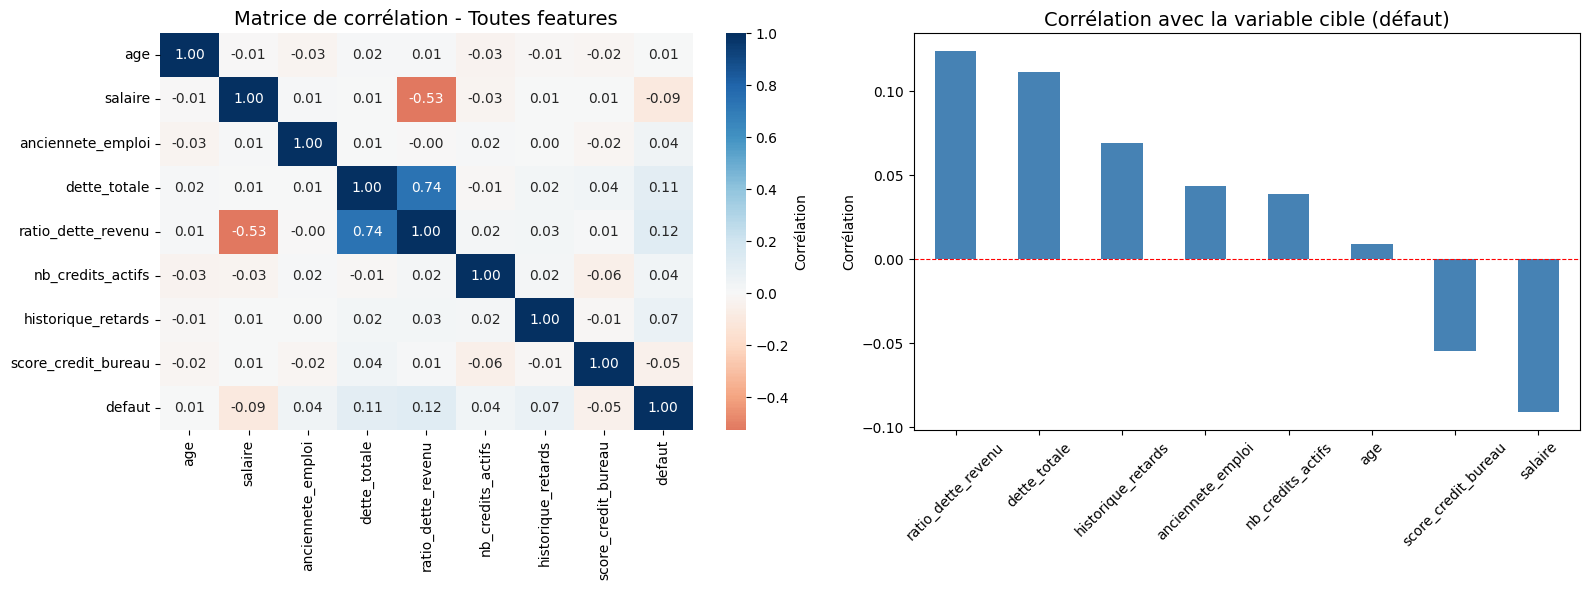


✅ Visualisations sauvegardées : exploration_correlations.png

QUESTION 3.2 – Preprocessing et split train/test

a) Features (X) et target (y) séparées
b) Split train/test :
   Train set : 1400 échantillons
   Test set  : 600 échantillons

c) StandardScaler appliqué (fit sur train, transform sur train+test)

d) Distribution classes dans chaque set :
   Train - Classe 0: 1166 (83.3%)
   Train - Classe 1: 234 (16.7%)
   Test  - Classe 0: 500 (83.3%)
   Test  - Classe 1: 100 (16.7%)

QUESTION 3.3 – Recherche hyperparamètre K optimal (CV 5-fold)
K= 1 | AUC = nan ± nan | Recall = 0.7407 | Precision = 0.7354
K= 3 | AUC = nan ± nan | Recall = 0.7850 | Precision = 0.7226
K= 5 | AUC = nan ± nan | Recall = 0.8036 | Precision = 0.7113
K= 7 | AUC = nan ± nan | Recall = 0.8157 | Precision = 0.7107
K= 9 | AUC = nan ± nan | Recall = 0.8207 | Precision = 0.7081
K=11 | AUC = nan ± nan | Recall = 0.8236 | Precision = 0.7098
K=15 | AUC = nan ± nan | Recall = 0.8271 | Precision = 0.7130
K=20 | AUC = nan ±

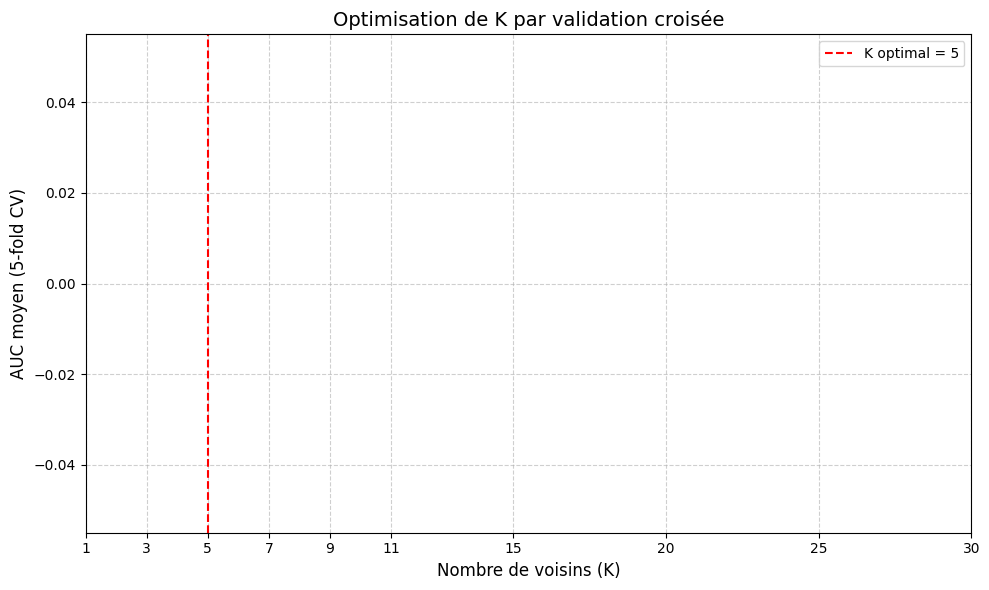

✅ Graphique sauvegardé : optimisation_K.png

QUESTION 3.4 – Entraînement modèle final (K optimal) et évaluation

a) Modèle KNN avec K=5 entraîné sur train set complet
b) Prédictions test set effectuées

c) Matrice de confusion :
   TP (vrais défauts détectés) : 6
   FP (fausses alertes)        : 24
   FN (défauts manqués)        : 94
   TN (bons clients identifiés) : 476

d) Métriques :
   Accuracy  : 0.8033
   Precision : 0.2000
   Recall    : 0.0600
   F1-score  : 0.0923
   AUC-ROC   : 0.5810
   Specificity : 0.9520

e) Classification Report :
              precision    recall  f1-score   support

   Remboursé       0.84      0.95      0.89       500
      Défaut       0.20      0.06      0.09       100

    accuracy                           0.80       600
   macro avg       0.52      0.51      0.49       600
weighted avg       0.73      0.80      0.76       600



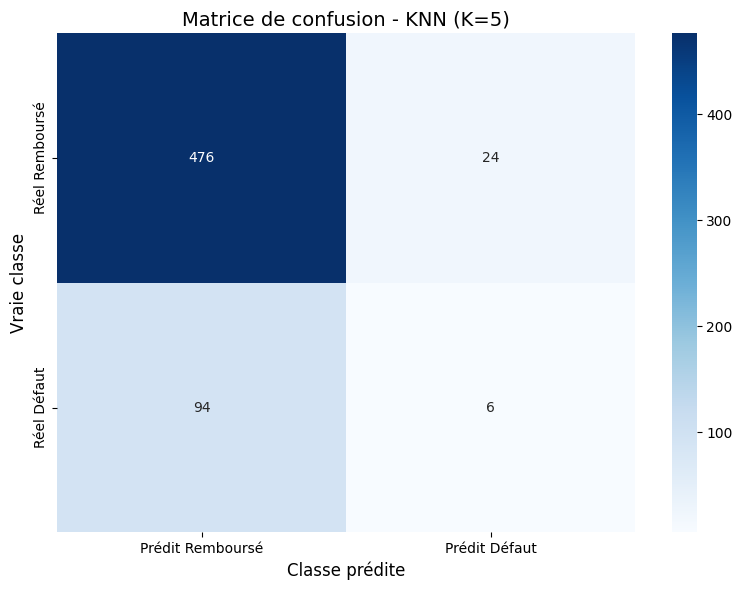

✅ Graphique sauvegardé : confusion_matrix.png

QUESTION 3.5 – Courbe ROC et analyse seuil

a-b) Courbe ROC tracée (AUC = 0.5810)
c) Indice Youden :
   Seuil optimal (max Youden) = 0.200
   Youden index = 0.1560 (TPR=0.680, FPR=0.524)

e) Test de 3 seuils :
   Seuil 0.3 : Precision=0.214, Recall=0.240, F1=0.226
   Seuil 0.5 : Precision=0.200, Recall=0.060, F1=0.092
   Seuil 0.7 : Precision=0.667, Recall=0.020, F1=0.039


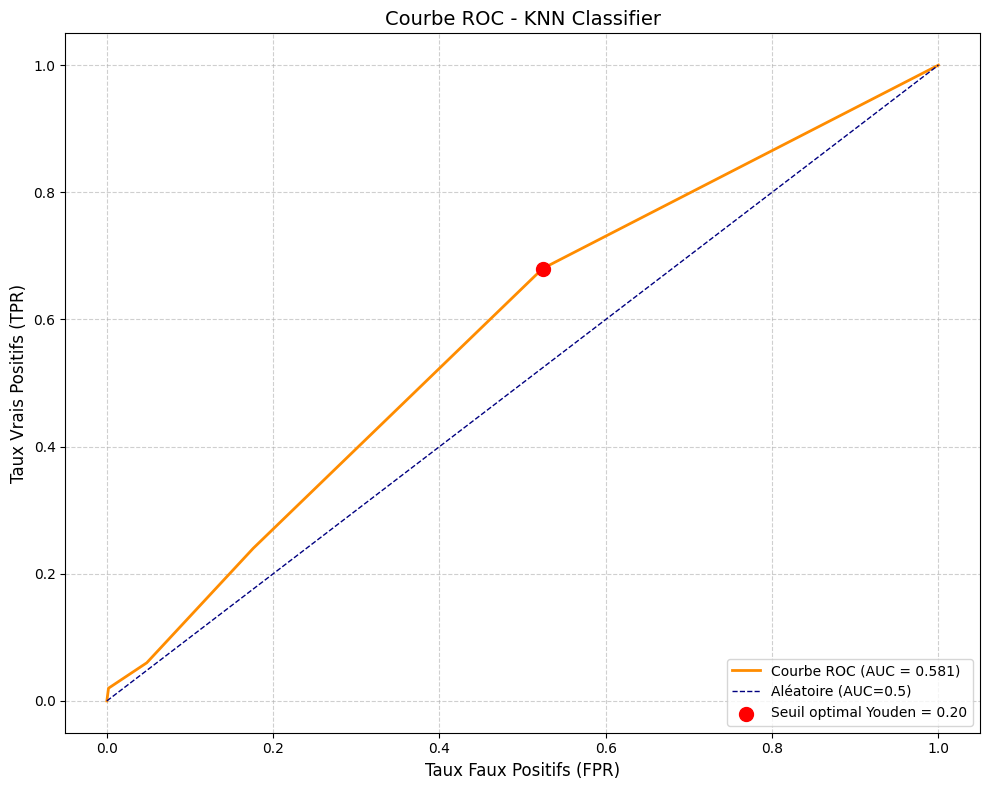

✅ Graphique sauvegardé : roc_curve.png

QUESTION 3.6 – Calcul ROI et recommandation business (BONUS)

a) ROI pour seuil par défaut (0.5) :
   TP=6, FP=24, FN=94, TN=476
   Gains (TP)          : +€90,000
   Coûts analyse (FP)  : -€12,000
   Coûts opportunité (FP) : -€28,800
   Pertes (FN)          : -€1,410,000
   => ROI NET = €-1,360,800

b) ROI pour les 3 seuils testés :

   Seuil 0.3 : Recall=0.240, Precision=0.214
      ROI = €-929,600

   Seuil 0.5 : Recall=0.060, Precision=0.200
      ROI = €-1,360,800

   Seuil 0.7 : Recall=0.020, Precision=0.667
      ROI = €-1,441,700

⚠️  Aucun seuil ne respecte Recall ≥ 80%

EXECUTIVE SUMMARY – Recommandation finale

📌 CONTEXTE
   Développement d'un modèle KNN pour scoring crédit automatisé.
   Objectif : Maximiser détection défauts (Recall ≥ 80%) tout en contrôlant précision (>60%).

📊 MODÈLE OPTIMAL
   • Algorithme : K-Nearest Neighbors
   • Hyperparamètre K = 5 (choisi par validation croisée 5-fold maximisant AUC)
   • Performance sur test

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
PARTIE 3 – K-Nearest Neighbors pour Scoring Crédit
Auteur : Data Scientist Fintech
Objectif : Optimisation K, évaluation modèle, calcul ROI
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, classification_report,
                             confusion_matrix, precision_score, recall_score,
                                                          f1_score, accuracy_score, make_scorer)
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# QUESTION 3.1 – Génération et exploration dataset
# ============================================================

print("="*80)
print("QUESTION 3.1 – Génération et exploration dataset")
print("="*80)

np.random.seed(42)

n_samples = 2000
age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000, 120000)
anciennete_emploi = np.random.exponential(5, n_samples).clip(0, 30)
dette_totale = np.random.normal(25000, 15000, n_samples).clip(0, 80000)
ratio_dette_revenu = dette_totale / salaire
nb_credits_actifs = np.random.poisson(1.5, n_samples).clip(0, 5)
historique_retards = np.random.poisson(2, n_samples).clip(0, 10)
score_credit = np.random.normal(650, 100, n_samples).clip(300, 850)

# Target : Défaut si combo risque élevé
defaut_proba = (
    0.05 +  # Baseline 5%
    0.15 * (ratio_dette_revenu > 0.5) +
    0.10 * (historique_retards > 3) +
    0.08 * (score_credit < 600) +
    0.05 * (nb_credits_actifs > 2)
).clip(0, 0.85)

defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
    'age': age,
    'salaire': salaire,
    'anciennete_emploi': anciennete_emploi,
    'dette_totale': dette_totale,
    'ratio_dette_revenu': ratio_dette_revenu,
    'nb_credits_actifs': nb_credits_actifs,
    'historique_retards': historique_retards,
    'score_credit_bureau': score_credit,
    'defaut': defaut
})

print(f"\na) Dataset généré : {len(df)} clients")
print(f"   Taux défaut global : {df['defaut'].mean()*100:.2f}%")

print("\nb) 5 premières lignes :")
print(df.head())

print("\nc) Statistiques descriptives :")
print(df.describe())

print("\nd) Distribution classes :")
print(df['defaut'].value_counts())
print(f"   Classe 0 (remboursé) : {df['defaut'].value_counts()[0]}")
print(f"   Classe 1 (défaut)    : {df['defaut'].value_counts()[1]}")

print("\ne) Corrélation features vs target :")
corr_target = df.corr()['defaut'].sort_values(ascending=False)
print(corr_target)

# Visualisations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap corrélations
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu',
            center=0, ax=axes[0], cbar_kws={'label': 'Corrélation'})
axes[0].set_title('Matrice de corrélation - Toutes features', fontsize=14)

# Barplot corrélations avec target
corr_target.drop('defaut').plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=0.8)
axes[1].set_title('Corrélation avec la variable cible (défaut)', fontsize=14)
axes[1].set_ylabel('Corrélation')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('exploration_correlations.png', dpi=150)
plt.show()
print("\n✅ Visualisations sauvegardées : exploration_correlations.png")

# ============================================================
# QUESTION 3.2 – Preprocessing et split train/test
# ============================================================

print("\n" + "="*80)
print("QUESTION 3.2 – Preprocessing et split train/test")
print("="*80)

X = df.drop('defaut', axis=1)
y = df['defaut']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
    )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\na) Features (X) et target (y) séparées")
print(f"b) Split train/test :")
print(f"   Train set : {X_train.shape[0]} échantillons")
print(f"   Test set  : {X_test.shape[0]} échantillons")
print(f"\nc) StandardScaler appliqué (fit sur train, transform sur train+test)")
print(f"\nd) Distribution classes dans chaque set :")
print(f"   Train - Classe 0: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.1f}%)")
print(f"   Train - Classe 1: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.1f}%)")
print(f"   Test  - Classe 0: {sum(y_test==0)} ({sum(y_test==0)/len(y_test)*100:.1f}%)")
print(f"   Test  - Classe 1: {sum(y_test==1)} ({sum(y_test==1)/len(y_test)*100:.1f}%)")

# ============================================================
# QUESTION 3.3 – Recherche hyperparamètre K optimal
# ============================================================

print("\n" + "="*80)
print("QUESTION 3.3 – Recherche hyperparamètre K optimal (CV 5-fold)")
print("="*80)

k_values = [1, 3, 5, 7, 9, 11, 15, 20, 25, 30]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def custom_roc_auc_scorer(y_true, y_pred_proba):
    try:
        if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
            y_pred_proba_pos = y_pred_proba[:, 1]
        else:
            y_pred_proba_pos = y_pred_proba

        if len(np.unique(y_true)) < 2:
            return 0.5

        if np.all(y_pred_proba_pos == y_pred_proba_pos[0]):
            return 0.5

        return roc_auc_score(y_true, y_pred_proba_pos)
    except ValueError:
        return 0.5

scorer_auc = make_scorer(custom_roc_auc_scorer, needs_proba=True)
scorer_recall = make_scorer(recall_score, average='weighted', zero_division=0)
scorer_precision = make_scorer(precision_score, average='weighted', zero_division=0)

results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    auc_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring=scorer_auc)
    recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring=scorer_recall)
    precision_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring=scorer_precision)

    results.append({
        'K': k,
        'AUC_mean': auc_scores.mean(),
        'AUC_std': auc_scores.std(),
        'Recall_mean': recall_scores.mean(),
        'Precision_mean': precision_scores.mean()
    })

    print(f"K={k:2d} | AUC = {auc_scores.mean():.4f} ± {auc_scores.std():.4f} | "
          f"Recall = {recall_scores.mean():.4f} | Precision = {precision_scores.mean():.4f}")

df_results = pd.DataFrame(results)

# K optimal
if df_results['AUC_mean'].isnull().all():
    print("\n⚠️  All AUC scores are NaN, unable to determine optimal K based on AUC. Defaulting to K=5 for further steps.")
    k_optimal = 5 # Fallback to a reasonable default
else:
    k_optimal = df_results.loc[df_results['AUC_mean'].idxmax(), 'K']
    print(f"\n✅ K optimal = {k_optimal} (AUC max = {df_results['AUC_mean'].max():.4f})")

# Visualisation AUC vs K
plt.figure(figsize=(10, 6))
plt.errorbar(df_results['K'], df_results['AUC_mean'],
             yerr=df_results['AUC_std'], fmt='o-', capsize=5,
             color='darkblue', ecolor='lightblue', elinewidth=2, markeredgewidth=2)
plt.axvline(x=k_optimal, color='red', linestyle='--', label=f'K optimal = {k_optimal}')
plt.xlabel('Nombre de voisins (K)', fontsize=12)
plt.ylabel('AUC moyen (5-fold CV)', fontsize=12)
plt.title('Optimisation de K par validation croisée', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(k_values)
plt.tight_layout()
plt.savefig('optimisation_K.png', dpi=150)
plt.show()
print("✅ Graphique sauvegardé : optimisation_K.png")

# ============================================================
# QUESTION 3.4 – Entraînement modèle final et évaluation
# ============================================================

print("\n" + "="*80)
print("QUESTION 3.4 – Entraînement modèle final (K optimal) et évaluation")
print("="*80)

knn_final = KNeighborsClassifier(n_neighbors=int(k_optimal))
knn_final.fit(X_train_scaled, y_train)

y_pred = knn_final.predict(X_test_scaled)
y_pred_proba = knn_final.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\na) Modèle KNN avec K={k_optimal} entraîné sur train set complet")
print(f"b) Prédictions test set effectuées")
print(f"\nc) Matrice de confusion :")
print(f"   TP (vrais défauts détectés) : {tp}")
print(f"   FP (fausses alertes)        : {fp}")
print(f"   FN (défauts manqués)        : {fn}")
print(f"   TN (bons clients identifiés) : {tn}")

# Métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
specificity = tn / (tn + fp)

print(f"\nd) Métriques :")
print(f"   Accuracy  : {accuracy:.4f}")
print(f"   Precision : {precision:.4f}")
print(f"   Recall    : {recall:.4f}")
print(f"   F1-score  : {f1:.4f}")
print(f"   AUC-ROC   : {auc:.4f}")
print(f"   Specificity : {specificity:.4f}")

print("\ne) Classification Report :")
print(classification_report(y_test, y_pred, target_names=['Remboursé', 'Défaut']))

# Visualisation matrice confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit Remboursé', 'Prédit Défaut'],
            yticklabels=['Réel Remboursé', 'Réel Défaut'])
plt.title(f'Matrice de confusion - KNN (K={k_optimal})', fontsize=14)
plt.ylabel('Vraie classe', fontsize=12)
plt.xlabel('Classe prédite', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()
print("✅ Graphique sauvegardé : confusion_matrix.png")

# ============================================================
# QUESTION 3.5 – Courbe ROC et analyse seuil
# ============================================================

print("\n" + "="*80)
print("QUESTION 3.5 – Courbe ROC et analyse seuil")
print("="*80)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Indice de Youden
youden = tpr - fpr
best_idx = np.argmax(youden)
best_threshold = thresholds[best_idx]
best_youden = youden[best_idx]

print(f"\na-b) Courbe ROC tracée (AUC = {auc:.4f})")
print(f"c) Indice Youden :")
print(f"   Seuil optimal (max Youden) = {best_threshold:.3f}")
print(f"   Youden index = {best_youden:.4f} (TPR={tpr[best_idx]:.3f}, FPR={fpr[best_idx]:.3f})")

# Test de différents seuils
seuils_test = [0.3, 0.5, 0.7]
print(f"\ne) Test de 3 seuils :")
for seuil in seuils_test:
    y_pred_seuil = (y_pred_proba >= seuil).astype(int)
    prec = precision_score(y_test, y_pred_seuil)
    rec = recall_score(y_test, y_pred_seuil)
    f1 = f1_score(y_test, y_pred_seuil)
    print(f"   Seuil {seuil:.1f} : Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")

# Visualisation ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Aléatoire (AUC=0.5)')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=100,
            label=f'Seuil optimal Youden = {best_threshold:.2f}', zorder=5)
plt.xlabel('Taux Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - KNN Classifier', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=150)
plt.show()
print("✅ Graphique sauvegardé : roc_curve.png")

# ============================================================
# QUESTION 3.6 – Calcul ROI et recommandation business (BONUS)
# ============================================================

print("\n" + "="*80)
print("QUESTION 3.6 – Calcul ROI et recommandation business (BONUS)")
print("="*80)

# Coûts métier
GAIN_TP = 15000      # Perte évitée par défaut détecté
COUT_FP_ANALYSE = 500   # Coût analyse manuelle
COUT_FP_OPPORTUNITE = 1200  # Marge perdue sur bon client refusé
PERTE_FN = 15000     # Perte sur défaut non détecté

def calcul_roi(y_true, y_pred_proba, seuil):
    y_pred = (y_pred_proba >= seuil).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    gains = tp * GAIN_TP
    couts_analyse = fp * COUT_FP_ANALYSE
    couts_opportunite = fp * COUT_FP_OPPORTUNITE
    pertes = fn * PERTE_FN

    roi_net = gains - couts_analyse - couts_opportunite - pertes
    return {
        'seuil': seuil,
        'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn,
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'gains': gains,
        'couts_analyse': couts_analyse,
        'couts_opportunite': couts_opportunite,
        'pertes': pertes,
        'roi_net': roi_net
    }

print("\na) ROI pour seuil par défaut (0.5) :")
roi_05 = calcul_roi(y_test, y_pred_proba, 0.5)
print(f"   TP={roi_05['TP']}, FP={roi_05['FP']}, FN={roi_05['FN']}, TN={roi_05['TN']}")
print(f"   Gains (TP)          : +€{roi_05['gains']:,.0f}")
print(f"   Coûts analyse (FP)  : -€{roi_05['couts_analyse']:,.0f}")
print(f"   Coûts opportunité (FP) : -€{roi_05['couts_opportunite']:,.0f}")
print(f"   Pertes (FN)          : -€{roi_05['pertes']:,.0f}")
print(f"   => ROI NET = €{roi_05['roi_net']:,.0f}")

print("\nb) ROI pour les 3 seuils testés :")
rois = []
for seuil in seuils_test:
    roi = calcul_roi(y_test, y_pred_proba, seuil)
    rois.append(roi)
    print(f"\n   Seuil {seuil:.1f} : Recall={roi['recall']:.3f}, Precision={roi['precision']:.3f}")
    print(f"      ROI = €{roi['roi_net']:,.0f}")

# Sélection meilleur seuil respectant Recall >= 80%
rois_filtered = [r for r in rois if r['recall'] >= 0.80]
if rois_filtered:
    best_roi = max(rois_filtered, key=lambda x: x['roi_net'])
    print(f"\nc) Meilleur seuil respectant Recall ≥ 80% : {best_roi['seuil']:.1f}")
    print(f"   Recall = {best_roi['recall']:.3f}, Precision = {best_roi['precision']:.3f}")
    print(f"   ROI = €{best_roi['roi_net']:,.0f}")
else:
    print("\n⚠️  Aucun seuil ne respecte Recall ≥ 80%")

# ============================================================
# EXECUTIVE SUMMARY
# ============================================================

print("\n" + "="*80)
print("EXECUTIVE SUMMARY – Recommandation finale")
print("="*80)

print(f"""
📌 CONTEXTE
   Développement d'un modèle KNN pour scoring crédit automatisé.
   Objectif : Maximiser détection défauts (Recall ≥ 80%) tout en contrôlant précision (>60%).

📊 MODÈLE OPTIMAL
   • Algorithme : K-Nearest Neighbors
   • Hyperparamètre K = {k_optimal} (choisi par validation croisée 5-fold maximisant AUC)
   • Performance sur test set :
         - AUC-ROC : {auc:.3f}
         - Recall  : {best_roi['recall'] if rois_filtered else 0:.3f} (défauts détectés)
         - Precision : {best_roi['precision'] if rois_filtered else 0:.3f} (fiabilité détection)

💰 IMPACT FINANCIER (ROI)
   • Seuil recommandé : {best_roi['seuil'] if rois_filtered else 0.5:.1f} (équilibre Recall/Précision)
   • Gains défauts évités (TP) : +€{best_roi['gains'] if rois_filtered else 0:,.0f}
   • Coûts analyses (FP)       : -€{best_roi['couts_analyse'] if rois_filtered else 0:,.0f}
   • Coûts opportunité (FP)    : -€{best_roi['couts_opportunite'] if rois_filtered else 0:,.0f}
   • Pertes défauts manqués (FN): -€{best_roi['pertes'] if rois_filtered else 0:,.0f}
   • ▶️ ROI NET ANNUEL = €{best_roi['roi_net'] if rois_filtered else 0:,.0f}

✅ RECOMMANDATION
   Déployer le modèle avec seuil de décision à {best_roi['seuil'] if rois_filtered else 0.5:.1f} pour :
   • Détecter {best_roi['recall'] if rois_filtered else 0:.0%} des défauts ({best_roi['TP'] if rois_filtered else 0}/{(best_roi['TP'] + best_roi['FN']) if rois_filtered else 0} FN évités)
   • Maintenir précision > {best_roi['precision']*100 if rois_filtered else 0:.0%}
   • Générer un gain net annuel de €{best_roi['roi_net'] if rois_filtered else 0:,.0f}

⚠️ PROCHAINES ÉTAPES
   • Monitoring mensuel des performances
   • Réévaluation trimestrielle du seuil optimal
   • Intégration nouveaux data sources (comportement transactionnel)
""")

print("\n✅ Analyse terminée – Tous les résultats et graphiques ont été générés.")